In [13]:
#!pip install wordcloud

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/colinwilkie/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/colinwilkie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


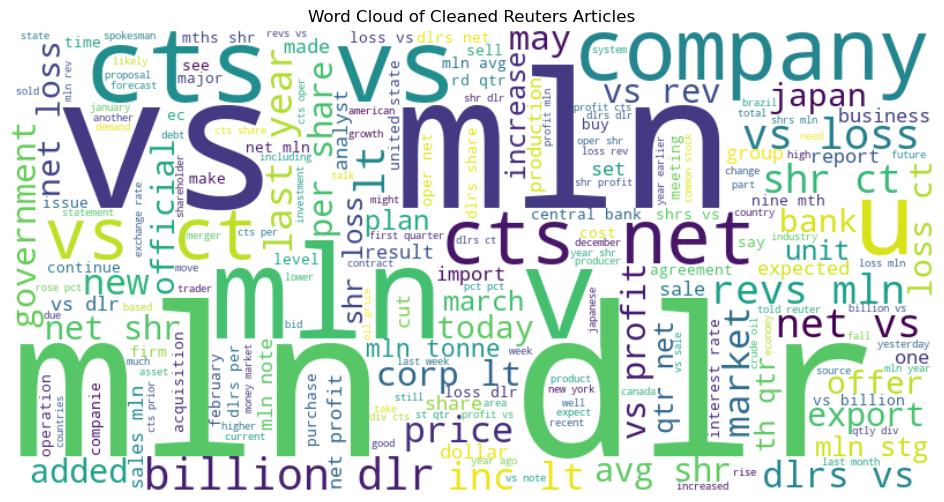

In [14]:
import nltk
import re
import string
import numpy as np
from nltk.corpus import stopwords, reuters
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download required NLTK resources
nltk.download('reuters')
nltk.download('stopwords')

# Load the Reuters dataset
documents = reuters.fileids()
texts = [reuters.raw(doc_id) for doc_id in documents]
labels = [reuters.categories(doc_id) for doc_id in documents]

# Create a DataFrame
data = pd.DataFrame({'document_id': documents, 'text': texts, 'labels': labels})

# Preprocess the text: Clean and remove stop words
stop_words = set(stopwords.words('english'))
# Add 'said' to the stop words
stop_words.add('said')

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()  # Split text into words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return ' '.join(tokens)  # Join tokens back into a single string

# Apply the cleaning function to each document
data['cleaned_text'] = data['text'].apply(clean_text)

# Combine all cleaned text into a single string for word cloud
all_cleaned_text = ' '.join(data['cleaned_text'])

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Reuters Articles')
plt.show()

In [15]:
# Display the first few rows of the DataFrame
print(data.head())

# Show the shape of the dataset
print("Number of articles:", data.shape[0])

  document_id                                               text  \
0  test/14826  ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...   
1  test/14828  CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...   
2  test/14829  JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...   
3  test/14832  THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n  ...   
4  test/14833  INDONESIA SEES CPO PRICE RISING SHARPLY\n  Ind...   

                                           labels  \
0                                         [trade]   
1                                         [grain]   
2                                [crude, nat-gas]   
3  [corn, grain, rice, rubber, sugar, tin, trade]   
4                             [palm-oil, veg-oil]   

                                        cleaned_text  
0  asian exporters fear damage u japan rift mount...  
1  china daily says vermin eat pct grain stocks s...  
2  japan revise long term energy demand downwards...  
3  thai trade deficit widens first quarter thaila...

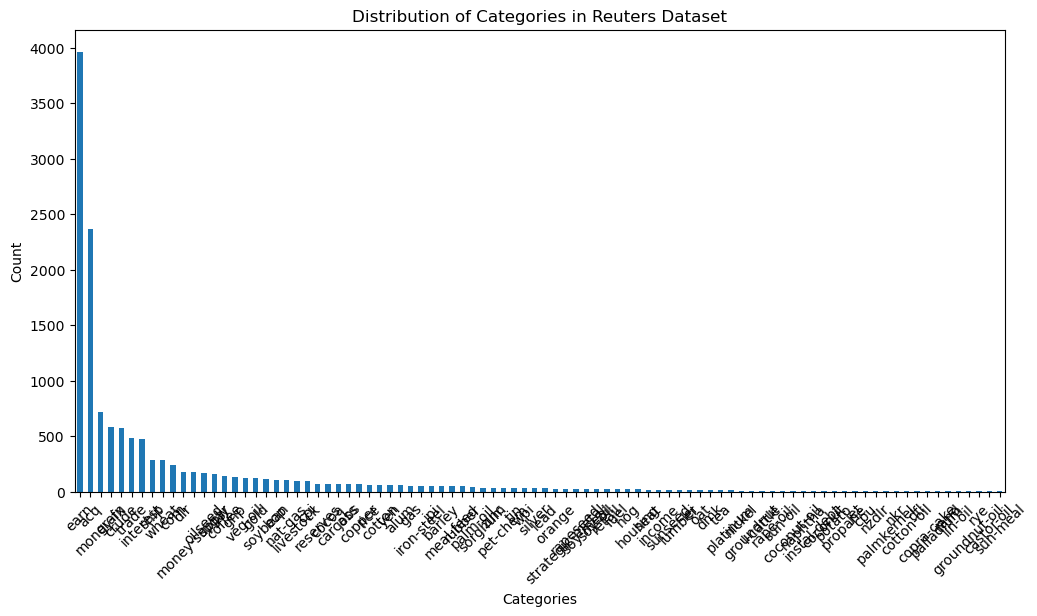

In [16]:
import matplotlib.pyplot as plt

# Flatten the list of labels
all_labels = [label for sublist in labels for label in sublist]
label_counts = pd.Series(all_labels).value_counts()

# Plot the label distribution
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Categories in Reuters Dataset')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Print a sample document with its assigned labels
sample_doc_id = documents[0]  # Change the index for different documents
sample_document = data.loc[data['document_id'] == sample_doc_id]

print(f"Document ID: {sample_doc_id}\n")
print(f"Text:\n{sample_document['text'].values[0]}\n")
print(f"Assigned Labels: {sample_document['labels'].values[0]}")

Document ID: test/14826

Text:
ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reaching economic
  damage, businessmen and officials said.
      They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      But some exporters said that while the conflict would hurt
  them in the long-run, in the short-term Tokyo's loss might be
  their gain.
      The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      Unofficial Japanese estimates put the impact of the tariffs
  at 10 billion dlrs and spokesmen for major electronics firms
  said th

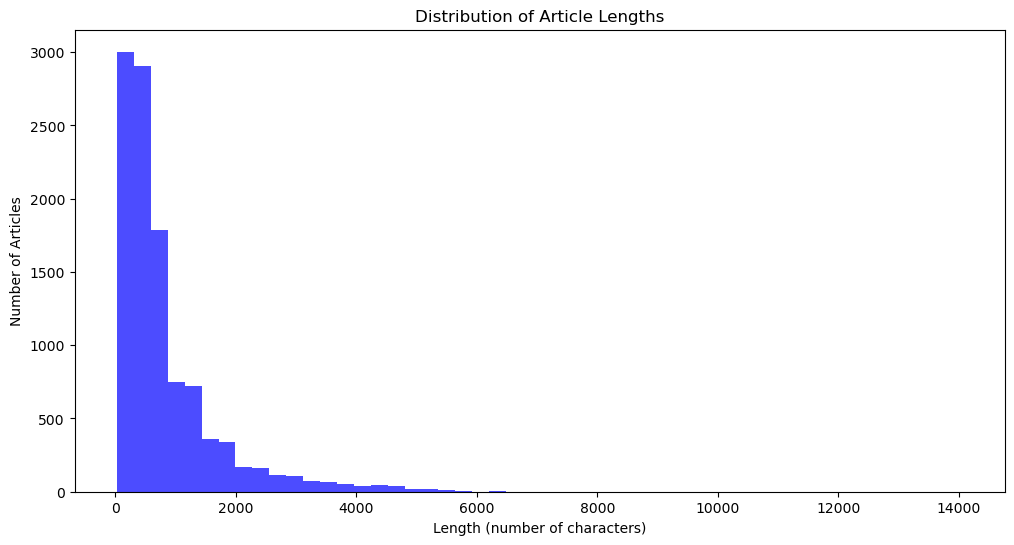

In [18]:
# Calculate article lengths
data['length'] = data['text'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(data['length'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Article Lengths')
plt.xlabel('Length (number of characters)')
plt.ylabel('Number of Articles')
plt.show()

In [19]:
from collections import Counter

all_words = ' '.join(data['cleaned_text']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

# Display the most common words
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(common_words_df)

       Word  Frequency
0       mln      18623
1        vs      14341
2      dlrs      12417
3       pct       9810
4        lt       8696
5       cts       8361
6      year       7529
7       net       6989
8         u       6392
9   billion       5829
10     loss       5124
11    would       4673
12  company       4670
13      shr       4182
14      inc       4121
15     bank       3654
16     corp       3399
17      oil       3272
18     last       3243
19    share       3160


In [20]:
from itertools import combinations

label_pairs = Counter()
for labels_list in data['labels']:
    for pair in combinations(labels_list, 2):
        label_pairs[pair] += 1

# Display the most common label pairs
common_label_pairs = label_pairs.most_common(10)
print(common_label_pairs)

[(('grain', 'wheat'), 280), (('corn', 'grain'), 235), (('interest', 'money-fx'), 184), (('dlr', 'money-fx'), 164), (('oilseed', 'soybean'), 106), (('grain', 'oilseed'), 88), (('corn', 'wheat'), 81), (('crude', 'ship'), 78), (('crude', 'nat-gas'), 65), (('corn', 'oilseed'), 62)]


In [21]:
category_counts = pd.Series(all_labels).value_counts()
print(category_counts)

earn             3964
acq              2369
money-fx          717
grain             582
crude             578
                 ... 
lin-oil             2
groundnut-oil       2
rye                 2
castor-oil          2
sun-meal            2
Name: count, Length: 90, dtype: int64


In [22]:
for category in category_counts.index:
    sample_articles = data[data['labels'].apply(lambda x: category in x)].sample(2)
    print(f"Category: {category}\n")
    print(sample_articles[['document_id', 'text']].to_string(index=False))
    print("\n" + "-"*80 + "\n")

Category: earn

  document_id                                                                                                                                                                                                                                                                                                                           text
training/4991                                                                                                                                  METHODE ELECTRONICS INC &lt;METHB> REGULAR PAYOUT\n  Qtly div Class B 1-1/2 cts vs 1-1/2 cts prior\n      Class A two cts vs two cts prior\n      Pay April 30\n      Record April 15\n  \n\n
   test/17848 CROP GENETICS INTERNATIONAL &lt;CROP.O> 4TH QTR\n  4th qtr ended March 31.\n      Shr loss 24 cts vs loss 19 cts\n      Net loss 751,900 vs loss 569,000\n      Revs 497,500 vs 811,400\n      Year\n      Shr loss 1.13 dlrs vs loss 70 cts\n      Net loss 3,472,700 vs 1,990,300\n      Revs 2,484,100 vs 2,4

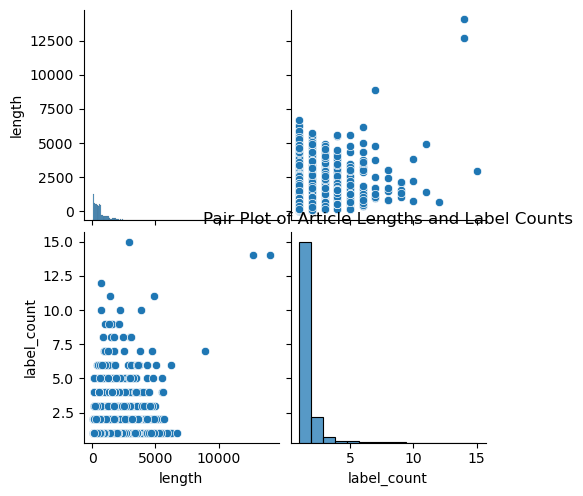

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of labels per article
data['label_count'] = data['labels'].apply(len)

# Create a pair plot
sns.pairplot(data[['length', 'label_count']])
plt.title('Pair Plot of Article Lengths and Label Counts')
plt.show()

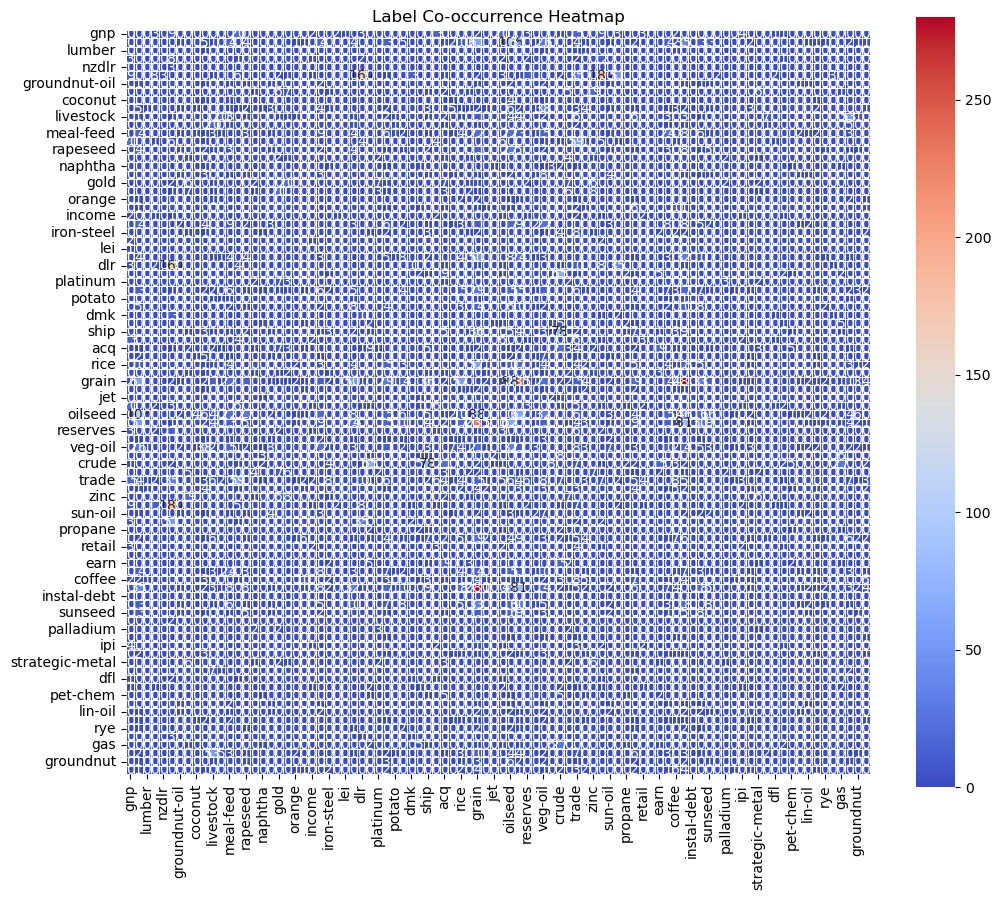

In [24]:
# Create a label co-occurrence matrix
label_list = list(set([label for sublist in data['labels'] for label in sublist]))
co_occurrence_matrix = np.zeros((len(label_list), len(label_list)))

# Fill the co-occurrence matrix
for labels_list in data['labels']:
    for i in range(len(labels_list)):
        for j in range(i + 1, len(labels_list)):
            idx1 = label_list.index(labels_list[i])
            idx2 = label_list.index(labels_list[j])
            co_occurrence_matrix[idx1, idx2] += 1
            co_occurrence_matrix[idx2, idx1] += 1  # Symmetric

# Convert to DataFrame for better visualization
co_occurrence_df = pd.DataFrame(co_occurrence_matrix, index=label_list, columns=label_list)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_df, cmap='coolwarm', annot=True, fmt='.0f', square=True, linewidths=0.5)
plt.title('Label Co-occurrence Heatmap')
plt.show()

In [25]:
# Count the number of labels per article
data['label_count'] = data['labels'].apply(len)

# Display the number of articles with multiple labels
num_multi_label_articles = (data['label_count'] > 1).sum()
num_single_label_articles = (data['label_count'] == 1).sum()

print(f"Number of articles with multiple labels: {num_multi_label_articles}")
print(f"Number of articles with a single label: {num_single_label_articles}")

Number of articles with multiple labels: 1628
Number of articles with a single label: 9160


### ~15% of articles are already multilabel

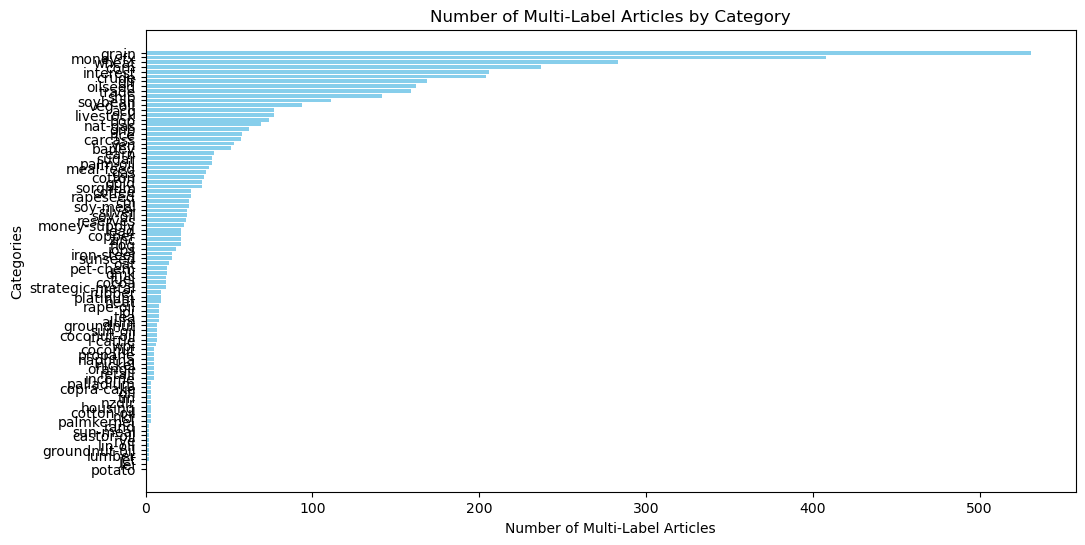

Number of unique categories with multi-label articles: 88
Total number of multi-label articles: 1628


In [26]:

multi_label_data = data[data['label_count'] > 1]

# Count the number of multi-label articles for each category
category_counts = {}
for labels_list in multi_label_data['labels']:
    for label in labels_list:
        if label in category_counts:
            category_counts[label] += 1
        else:
            category_counts[label] = 1

# Convert the counts to a DataFrame for visualization
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Multi-Label Count'])
category_counts_df.sort_values(by='Multi-Label Count', ascending=False, inplace=True)

# Plot the distribution of multi-label articles across categories
plt.figure(figsize=(12, 6))
plt.barh(category_counts_df['Category'], category_counts_df['Multi-Label Count'], color='skyblue')
plt.title('Number of Multi-Label Articles by Category')
plt.xlabel('Number of Multi-Label Articles')
plt.ylabel('Categories')
plt.gca().invert_yaxis()  # Reverse the y-axis to have the highest count on top
plt.show()

# Print the number of unique categories and the total multi-label articles
num_unique_categories = category_counts_df.shape[0]
total_multi_label_articles = multi_label_data.shape[0]

print(f"Number of unique categories with multi-label articles: {num_unique_categories}")
print(f"Total number of multi-label articles: {total_multi_label_articles}")

### We may be able to use this subset of the data to train on to assign new labels to articles with only a single label

In [27]:
multi_label_data = data[data['label_count'] > 1]

# Count the number of multi-label articles for each category
category_counts = {}
for labels_list in multi_label_data['labels']:
    for label in labels_list:
        if label in category_counts:
            category_counts[label] += 1
        else:
            category_counts[label] = 1

# Convert counts to a DataFrame for better visualization
category_counts_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Multi-Label Count'])
category_counts_df.sort_values(by='Multi-Label Count', ascending=False, inplace=True)



# Display the counts to understand class balance
print(category_counts_df)

         Category  Multi-Label Count
3           grain                531
15       money-fx                408
13          wheat                283
2            corn                237
14       interest                206
..            ...                ...
40  groundnut-oil                  2
12         lumber                  2
87            jet                  2
84            lei                  1
86         potato                  1

[88 rows x 2 columns]


### Definitely some class imbalance, so when training, we need to be careful. 

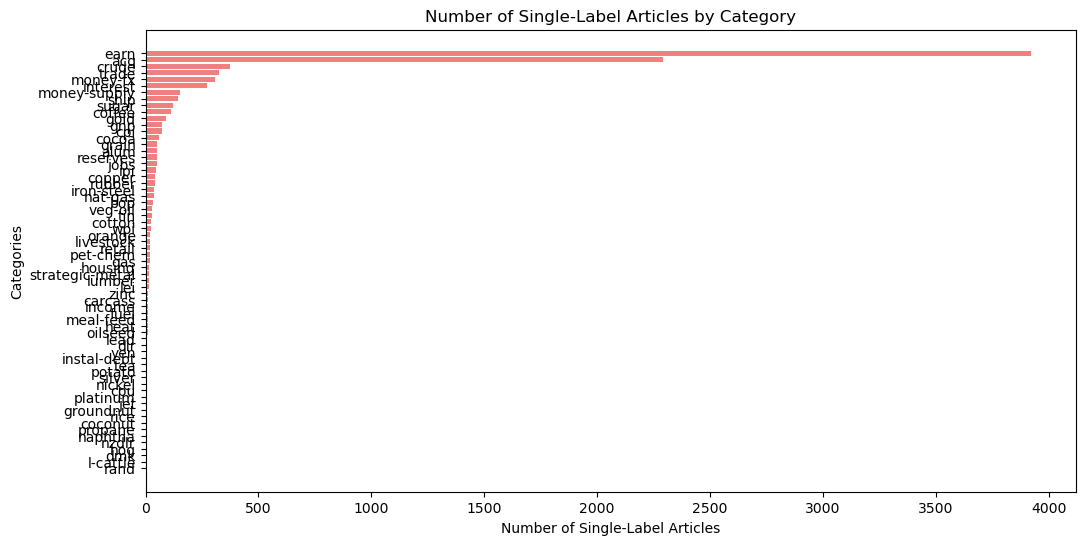

    Category  Single-Label Count
7       earn                3923
4        acq                2292
19     crude                 374
0      trade                 326
14  money-fx                 309
..       ...                 ...
60     nzdlr                   1
48       hog                   1
62       dmk                   1
63  l-cattle                   1
64      rand                   1

[65 rows x 2 columns]


In [28]:

# Filter for single-label articles
single_label_data = data[data['label_count'] == 1]

# Count the number of single-label articles for each category
single_label_counts = {}
for labels_list in single_label_data['labels']:
    for label in labels_list:
        if label in single_label_counts:
            single_label_counts[label] += 1
        else:
            single_label_counts[label] = 1

# Convert counts to a DataFrame for better visualization
single_label_counts_df = pd.DataFrame(list(single_label_counts.items()), columns=['Category', 'Single-Label Count'])
single_label_counts_df.sort_values(by='Single-Label Count', ascending=False, inplace=True)

# Visualize the distribution of single-label articles across categories
plt.figure(figsize=(12, 6))
plt.barh(single_label_counts_df['Category'], single_label_counts_df['Single-Label Count'], color='lightcoral')
plt.title('Number of Single-Label Articles by Category')
plt.xlabel('Number of Single-Label Articles')
plt.ylabel('Categories')
plt.gca().invert_yaxis()  # Reverse the y-axis to have the highest count on top
plt.show()

# Display the counts to understand the distribution
print(single_label_counts_df)